
<html>
    <h1 style="text-align:center;background-color:#fdabce;font-size='150px';text-shadow:5px 5px 5px 5px"> Heart Disease Prediction</h1>
    
</html>
    
        


<html>
    <h1 style="text-align:center;background-color:#abcdef;font-size='150px';"> TABLE OF CONTENTS</h1>
    <ol>
        <li>Import Necessary Library  </li>
        <li>Data </li>
        <li>Preprocessing  </li>
        <li>Exploratory Data Analysis  </li>
        <li>Feature Engineering  </li>
        <li>Train Model  </li>
        <li>Model Accuracy  </li>
        <li>Test  Model</li>
        
    </ol>
    
</html>
    
        

## 1. Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 2. Data 

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print('Shape of Data Frame: ',df.shape)

Shape of Data Frame:  (918, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 3.Preprocessing

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

## 4. Exploratory Data Analysis

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

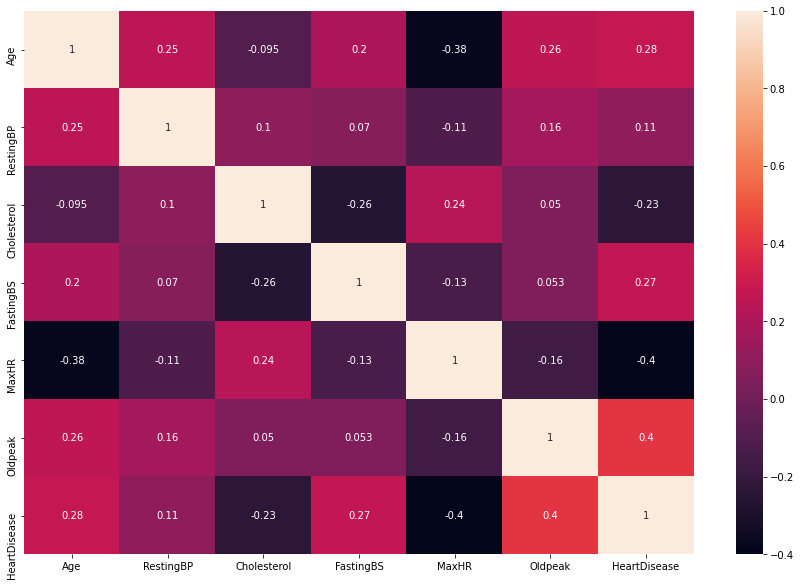

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [12]:
numerical_column=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
categorical_column=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

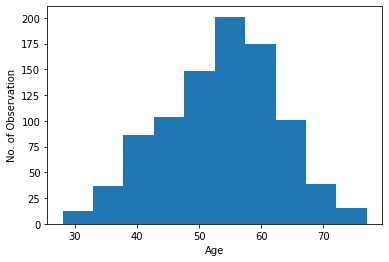

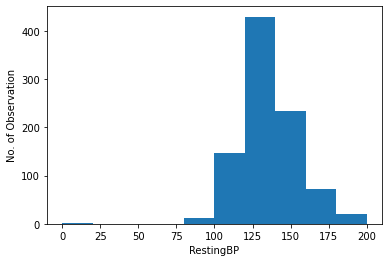

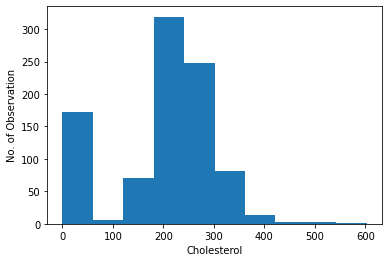

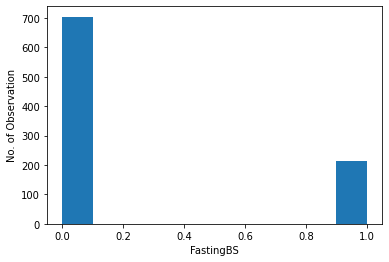

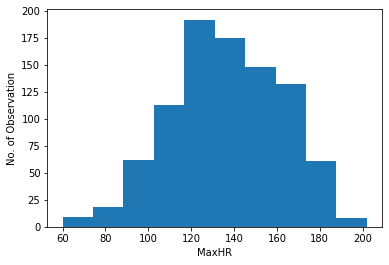

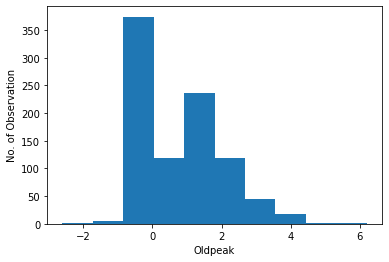

In [13]:

for i in numerical_column:
    plt.xlabel(i)
    plt.ylabel('No. of Observation')
    plt.hist(df[i])
    plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

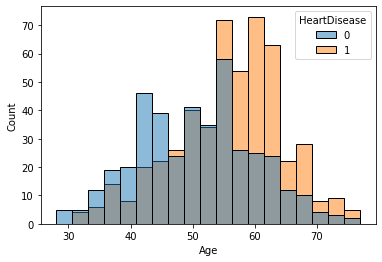

In [14]:
sns.histplot(data=df,x='Age',hue='HeartDisease')

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

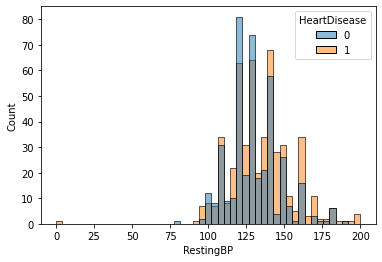

In [15]:
sns.histplot(data=df,x='RestingBP',hue='HeartDisease')

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

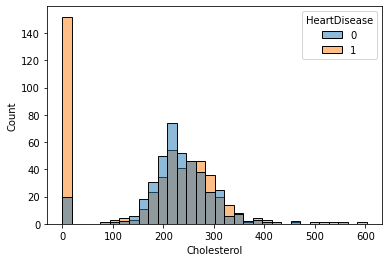

In [16]:
sns.histplot(data=df,x='Cholesterol',hue='HeartDisease')

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

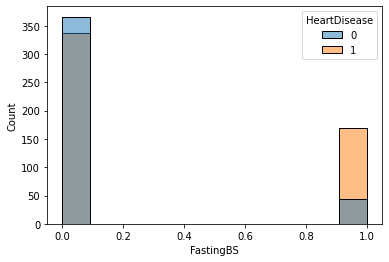

In [17]:
sns.histplot(data=df,x='FastingBS',hue='HeartDisease')

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

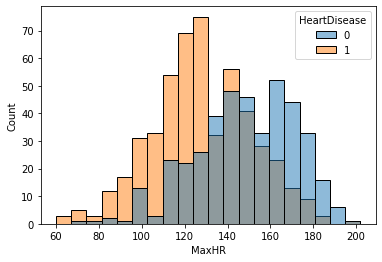

In [18]:
sns.histplot(data=df,x='MaxHR',hue='HeartDisease')

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

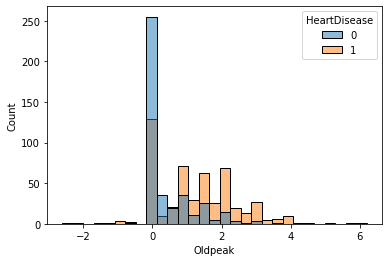

In [19]:
sns.histplot(data=df,x='Oldpeak',hue='HeartDisease')

In [20]:
HaveHeartDisease=df[df['HeartDisease']==1].shape[0]

In [21]:
NotHaveHeartDisease=df[df['HeartDisease']==0].shape[0]

In [22]:
print("No. of Patient Having Heart Disease: ",HaveHeartDisease)
print("No. of Patient don't Have Heart Disease: ",NotHaveHeartDisease)

No. of Patient Having Heart Disease:  508
No. of Patient don't Have Heart Disease:  410


([<matplotlib.patches.Wedge at 0x18a95c5c470>,
 [Text(-0.1835941114214546, 1.0845705151124876, '1'),
  Text(0.1835941114214547, -1.0845705151124876, '0')],
 [Text(-0.10014224259352068, 0.5915839173340841, '55.3%'),
  Text(0.10014224259352074, -0.5915839173340841, '44.7%')])

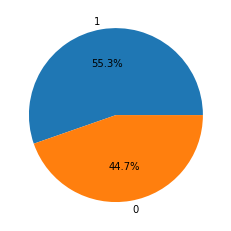

In [23]:
plt.pie([HaveHeartDisease,NotHaveHeartDisease],autopct='%1.1f%%',labels=['1','0'])

## Working with Categorical Data

In [24]:
categorical_column=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']


<AxesSubplot:xlabel='Sex', ylabel='Count'>

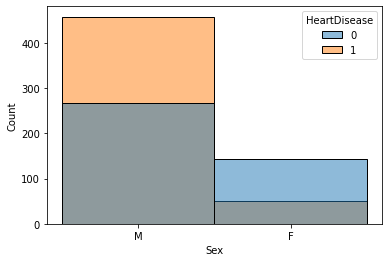

In [25]:
sns.histplot(data=df,x='Sex',hue='HeartDisease')

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

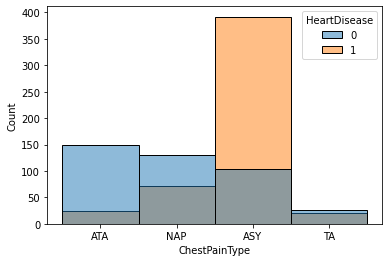

In [26]:
sns.histplot(data=df,x='ChestPainType',hue='HeartDisease')

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

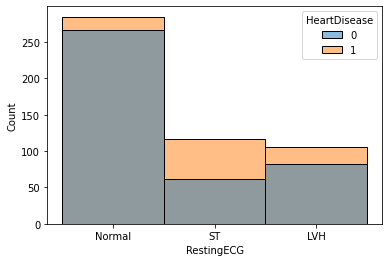

In [27]:
sns.histplot(data=df,x='RestingECG',hue='HeartDisease')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

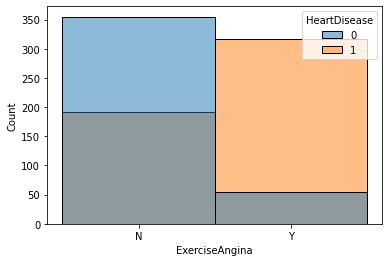

In [28]:
sns.histplot(data=df,x='ExerciseAngina',hue='HeartDisease')

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

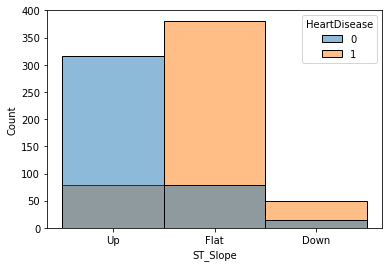

In [29]:
sns.histplot(data=df,x='ST_Slope',hue='HeartDisease')

## 5. Feature Engineering

In [30]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# 6. Training of Model

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [32]:
xtrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
177,59,M,ATA,140,287,0,Normal,150,N,0.0,Up
232,38,F,ATA,120,275,0,Normal,129,N,0.0,Up
866,44,M,ATA,130,219,0,LVH,188,N,0.0,Up
690,45,M,ASY,142,309,0,LVH,147,Y,0.0,Flat
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat


In [33]:
xtest.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
878,49,M,ATA,130,266,0,Normal,171,N,0.6,Up
209,54,M,ASY,125,216,0,Normal,140,N,0.0,Flat
78,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up
41,54,F,NAP,130,294,0,ST,100,Y,0.0,Flat


In [34]:
#xtrain=pd.get_dummies(xtrain,columns=categorical_column,drop_first=True)
#xtest=pd.get_dummies(xtest,columns=categorical_column,drop_first=True)
#LE=LabelEncoder()
#xtrain['Sex']=LE.fit_transform(xtrain['Sex'])
#xtest['Sex']=LE.transform(xtest['Sex'])
obj={}

#categorical_column=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in categorical_column:
    le=LabelEncoder()
    obj[i]=le
    xtrain[i]=obj[i].fit_transform(xtrain[i])
    xtest[i]=obj[i].transform(xtest[i])



C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [35]:
obj

{'Sex': LabelEncoder(),
 'ChestPainType': LabelEncoder(),
 'RestingECG': LabelEncoder(),
 'ExerciseAngina': LabelEncoder(),
 'ST_Slope': LabelEncoder()}

In [36]:
print(xtrain.shape,xtest.shape)

(642, 11) (276, 11)


In [37]:
xtrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
177,59,1,1,140,287,0,1,150,0,0.0,2
232,38,0,1,120,275,0,1,129,0,0.0,2
866,44,1,1,130,219,0,0,188,0,0.0,2
690,45,1,0,142,309,0,0,147,1,0.0,1
296,50,1,0,145,0,1,1,139,1,0.7,1


In [38]:
xtest.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
913,45,1,3,110,264,0,1,132,0,1.2,1
878,49,1,1,130,266,0,1,171,0,0.6,2
209,54,1,0,125,216,0,1,140,0,0.0,1
78,52,1,1,140,100,0,1,138,1,0.0,2
41,54,0,2,130,294,0,2,100,1,0.0,1


In [39]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(xtrain)
x_test_scaled=sc.fit_transform(xtest)


In [40]:
x_train_scaled

array([[ 0.56641966,  0.51117185,  0.22082063, ..., -0.84922295,
        -0.87469691,  1.10403757],
       [-1.66255579, -1.95628926,  0.22082063, ..., -0.84922295,
        -0.87469691,  1.10403757],
       [-1.02570566,  0.51117185,  0.22082063, ..., -0.84922295,
        -0.87469691,  1.10403757],
       ...,
       [ 0.14185291,  0.51117185, -0.80647536, ..., -0.84922295,
        -0.78004742, -0.55589714],
       [ 1.09712811, -1.95628926, -0.80647536, ...,  1.17754707,
         0.07179798, -0.55589714],
       [ 0.03571122, -1.95628926,  0.22082063, ..., -0.84922295,
        -0.87469691,  1.10403757]])

In [41]:
xtrain=pd.DataFrame(x_train_scaled,columns=xtrain.columns[:])
xtest=pd.DataFrame(x_test_scaled,columns=xtest.columns[:])
xtrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.566420,0.511172,0.220821,0.422303,0.796292,-0.559360,0.047196,0.516996,-0.849223,-0.874697,1.104038
1,-1.662556,-1.956289,0.220821,-0.712321,0.683645,-0.559360,0.047196,-0.295469,-0.849223,-0.874697,1.104038
2,-1.025706,0.511172,0.220821,-0.145009,0.157960,-0.559360,-1.547546,1.987170,-0.849223,-0.874697,1.104038
3,-0.919564,0.511172,-0.806475,0.535765,1.002811,-0.559360,-1.547546,0.400929,1.177547,-0.874697,-0.555897
4,-0.388856,0.511172,-0.806475,0.705958,-1.897845,1.787758,0.047196,0.091419,1.177547,-0.212150,-0.555897


In [42]:
m1=LogisticRegression()
m2=RidgeClassifier(alpha=0.25)
m3=DecisionTreeClassifier(criterion='gini',max_depth=5)
m4=RandomForestClassifier(criterion='gini',n_estimators=50)
m5=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.1,n_estimators=150)
m6=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.05,n_estimators=100)
m7=XGBClassifier(learning_rate=0.1,n_estimators=50)
m8=KNeighborsClassifier(n_neighbors=7)


In [43]:
dictionary={'Logistic Regression':m1,'Ridge':m2,'Decision Tree':m3,'Random Forest':m4,'Ada Booster':m5,'Gradient Boost':m6,'XGB boost':m7,'KNN':m8}


In [44]:
best=0
bestName='Logistic Regression'
ScoreName={}
for i in dictionary.keys():
    model=dictionary[i]
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    score=model.score(xtest,ytest)
    print("Model Name: ",i)
    print("Accuracy: ",accuracy_score(ytest,pred))
    print()
    print(classification_report(ytest,pred))
    print('Confusion Matrix: \n',confusion_matrix(ytest,pred))
    print('##################################################################')
    if(score>best):
        best=score
        bestName=i
    ScoreName[i]=score

Model Name:  Logistic Regression
Accuracy:  0.8405797101449275

             precision    recall  f1-score   support

          0       0.90      0.77      0.83       142
          1       0.79      0.91      0.85       134

avg / total       0.85      0.84      0.84       276

Confusion Matrix: 
 [[110  32]
 [ 12 122]]
##################################################################
Model Name:  Ridge
Accuracy:  0.8478260869565217

             precision    recall  f1-score   support

          0       0.90      0.79      0.84       142
          1       0.80      0.91      0.85       134

avg / total       0.85      0.85      0.85       276

Confusion Matrix: 
 [[112  30]
 [ 12 122]]
##################################################################
Model Name:  Decision Tree
Accuracy:  0.8297101449275363

             precision    recall  f1-score   support

          0       0.84      0.82      0.83       142
          1       0.82      0.84      0.83       134

avg / total      

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Name:  XGB boost
Accuracy:  0.8333333333333334

             precision    recall  f1-score   support

          0       0.89      0.77      0.83       142
          1       0.79      0.90      0.84       134

avg / total       0.84      0.83      0.83       276

Confusion Matrix: 
 [[109  33]
 [ 13 121]]
##################################################################
Model Name:  KNN
Accuracy:  0.8768115942028986

             precision    recall  f1-score   support

          0       0.93      0.82      0.87       142
          1       0.83      0.93      0.88       134

avg / total       0.88      0.88      0.88       276

Confusion Matrix: 
 [[117  25]
 [  9 125]]
#####

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
print("Maximum Score: ",best)
print("Name: ",bestName)

Maximum Score:  0.8768115942028986
Name:  KNN


In [46]:
ScoreName

{'Logistic Regression': 0.8405797101449275,
 'Ridge': 0.8478260869565217,
 'Decision Tree': 0.8297101449275363,
 'Random Forest': 0.8623188405797102,
 'Ada Booster': 0.8659420289855072,
 'Gradient Boost': 0.8586956521739131,
 'XGB boost': 0.8333333333333334,
 'KNN': 0.8768115942028986}

## Building Model with Best algorithm

In [47]:
model=dictionary[bestName]
model.fit(xtrain,ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [48]:
def Prediction(feature):
    #categorical_column=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
    # obj dictionary contins objects of all column of Label Encoder(Categorical type)
    for i in categorical_column:
        feature[i]=obj[i].transform(feature[i])  # LabelEncoder/ Changing Categorical data to numerical form
    
    feature=sc.transform(feature)    #Standard Scalling
    predctValue=model.predict(feature)
    print(predctValue)
    
    return predctValue
    

In [49]:
def CheckEntry():
    from tkinter import messagebox
    if(e1.get() == "" or e2.get() == "" or e3.get()=="" or e4.get()=="" or e5.get()=="" or e6.get()=="" or e7.get()=="" or e8.get()=="" or e9.get()=="" or e10.get()=="" or e11.get()==""):
        
        messagebox.showinfo('Alert','Please provide all information')
    
    
    else:
        '''
            Age                 int64
            Sex                object
            ChestPainType      object
            RestingBP           int64
            Cholesterol         int64
            FastingBS           int64
            RestingECG         object
            MaxHR               int64
            ExerciseAngina     object
            Oldpeak           float64
            ST_Slope           object
            HeartDisease        int64
        
        '''
        d={'Age':int(e1.get()),'Sex':e2.get(),'ChestPainType':e3.get(),'RestingBP':int(e4.get()),'Cholesterol':int(e5.get()),'FastingBS':int(e6.get()),'RestingECG':e7.get(),'MaxHR':int(e8.get()),'ExerciseAngina':e9.get(),'Oldpeak':float(e10.get()),'ST_Slope':e11.get()}
        feature=pd.DataFrame(data=d,index=np.array([0]))
        
        predctValue=Prediction(feature)
        if predctValue==0:
            messagebox.showinfo('Result','You are Safe You, Your case is not under Heart Disease condition ')
        else:
            messagebox.showinfo('Result','You need treatmeant, Your case is under Heart Disease condition, Take care')
        

In [53]:
import tkinter as tk
win=tk.Tk()
win.title('Heart Disease Prediction')

win.geometry("650x500+500+200")
win.attributes('-alpha',1)

win.iconbitmap('heartdisease.ico')
win.configure(bg='cyan')


tk.Label(win,text='                                                      ',bg='cyan',fg='cyan').grid(column=0)
tk.Label(win,text='Age',bg='cyan').grid(row=0,column=1)
e1=tk.Entry(win)
e1.grid(row=0,column=2)

tk.Label(win,text='Sex',bg='cyan').grid(row=1,column=1)
e2=tk.Entry(win)
e2.grid(row=1,column=2)

tk.Label(win,text='ChestPainType',bg='cyan').grid(row=2,column=1)
e3=tk.Entry(win)
e3.grid(row=2,column=2)

tk.Label(win,text='RestingBP',bg='cyan').grid(row=3,column=1)
e4=tk.Entry(win)
e4.grid(row=3,column=2)

tk.Label(win,text='Cholesterol',bg='cyan').grid(row=4,column=1)
e5=tk.Entry(win)
e5.grid(row=4,column=2)

tk.Label(win,text='FastingBS',bg='cyan').grid(row=5,column=1)
e6=tk.Entry(win)
e6.grid(row=5,column=2)

tk.Label(win,text='RestingECG',bg='cyan').grid(row=6,column=1)
e7=tk.Entry(win)
e7.grid(row=6,column=2)

tk.Label(win,text='MaxHR',bg='cyan').grid(row=7,column=1)
e8=tk.Entry(win)
e8.grid(row=7,column=2)

tk.Label(win,text='ExerciseAngina',bg='cyan').grid(row=8,column=1)
e9=tk.Entry(win)
e9.grid(row=8,column=2)

tk.Label(win,text='Oldpeak',bg='cyan').grid(row=9,column=1)
e10=tk.Entry(win)
e10.grid(row=9,column=2)

tk.Label(win,text='ST_Slope',bg='cyan').grid(row=10,column=1)
e11=tk.Entry(win)
e11.grid(row=10,column=2)

def HalloCall():
    print("Hello")


tk.Label(win,text='           ',bg='cyan').grid(row=11)

tk.Label(win,text='           ',bg='cyan').grid(row=12)

B=tk.Button(win,text="Check",command=CheckEntry,fg='red',activebackground='yellow',activeforeground='pink',bd='5')
B.grid(row=15,column=2)

tk.Label(win,text="We cannot ensure accuracy of 100%",fg='red',bd=5,bg='cyan').grid(row=17,column=2)

win.mainloop()

[0]


In [51]:
model.predict(xtest)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [52]:
xtest

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-0.864683,0.527046,2.437656,-1.079991,0.634159,-0.532655,-0.051029,-0.212797,-0.765641,0.367722,-0.692574
1,-0.440601,0.527046,0.249711,-0.099312,0.651522,-0.532655,-0.051029,1.380074,-0.765641,-0.186370,0.941191
2,0.089503,0.527046,-0.844262,-0.344481,0.217447,-0.532655,-0.051029,0.113946,-0.765641,-0.740463,-0.692574
3,-0.122538,0.527046,0.249711,0.391028,-0.789608,-0.532655,-0.051029,0.032260,1.306094,-0.740463,0.941191
4,0.089503,-1.897367,1.343684,-0.099312,0.894604,-0.532655,1.513848,-1.519769,1.306094,-0.740463,-0.692574
...,...,...,...,...,...,...,...,...,...,...,...
271,0.407565,0.527046,-0.844262,0.881368,0.556025,-0.532655,-0.051029,-1.846512,1.306094,2.029998,-0.692574
272,-0.334580,0.527046,-0.844262,0.391028,0.347669,-0.532655,1.513848,0.113946,1.306094,3.876972,-0.692574
273,-1.182746,0.527046,-0.844262,0.391028,0.304262,-0.532655,-0.051029,1.665974,-0.765641,-0.740463,0.941191
274,1.255731,0.527046,-0.844262,0.881368,0.382395,-0.532655,-0.051029,-0.702912,1.306094,0.644768,-0.692574
